In [82]:
from tqdm import tqdm
from pprint import pprint
from nltk.metrics import distance

import matplotlib.pyplot as plt
import pickle
import numpy as np
import os
import csv
import json
import random
import shutil

### Util

In [83]:
def violin_and_boxplot(list1):
    print('mean:{}'.format(np.mean(list1)))
    plt.style.use('default')
    fig, ax = plt.subplots()
    ax.violinplot([list1], vert=False)
    ax.boxplot([list1], vert=False)
    # plt.xscale('log')
    plt.yticks([1], ['target'])
    plt.show()

def bar_graph(sequence_stat):
    x = np.arange(len(sequence_stat))
    sequence_str = sequence_stat.keys()
    values = sequence_stat.values()

    plt.bar(x, values)
    plt.xticks(x, sequence_str)
    plt.show()

def makedirs(path): 
   try: 
        os.makedirs(path) 
   except OSError:
       if not os.path.isdir(path): 
           raise

def get_bug_info(target_bug_id):
    with open('/home/apr/extDrive1/samsung/TFix/data/dataset/test_data_all_result.json', 'r') as f:
        test_dataset = json.load(f)
    for instance in test_dataset:
        if instance['id'] == target_bug_id:
            return instance

def read_json(file_dir):
    with open(file_dir, 'r') as f:
        return json.load(f)
def write_json(json_content, file_dir):
    with open(file_dir, 'w') as f:
        json.dump(json_content, f)
def read_pickle(file_dir):
    with open(file_dir, 'rb') as f:
        return pickle.load(f)
def write_pickle(file_content, file_dir):
    with open(file_dir, 'wb') as f:
        pickle.dump(file_content, f)

def sort_dict_by_value(target_dict):
    return sorted(target_dict.items(), key=lambda x:x[1], reverse=True)

### read csv files

In [84]:
donorcode_answer_dir = '../Data/DonorCodes.txt'
direction_result_dir = '../Data/HitRatio/keyword.csv'
global_search_result_dir = '../Data/globalsearch.csv'

In [85]:
with open(donorcode_answer_dir, 'r') as f:
    answer_list = f.readlines()

In [86]:
global_result = []
with open(global_search_result_dir, 'r') as f:
    rdr = csv.reader(f)
    for line in rdr:
        global_result.append(line)

In [87]:
direction_result = []
with open(direction_result_dir, 'r') as f:
    rdr = csv.reader(f)
    for line in rdr:
        direction_result.append(line)

In [88]:
answer_dict = {}
for donorcode_answer in answer_list:
    bug_id = donorcode_answer.strip().split('@')[0]
    keyword_list = donorcode_answer.strip().split('@')[1].strip().split(',')
    # print(keyword_list)
    if len(keyword_list) == 1 and keyword_list[0] == '':
        print(bug_id)
    else:
        answer_dict[bug_id] = keyword_list

Chart_1
Chart_15
Chart_20
Closure_4
Closure_6
Closure_11
Closure_13
Closure_18
Closure_22
Closure_31
Closure_33
Closure_46
Closure_62
Closure_73
Closure_78
Closure_86
Closure_101
Closure_102
Closure_115
Closure_117
Closure_126
Closure_168
Lang_10
Lang_25
Lang_29
Lang_50
Lang_51
Lang_53
Lang_57
Lang_58
Math_2
Math_22
Math_27
Math_30
Math_34
Math_50
Math_57
Math_60
Math_63
Math_69
Math_77
Math_79
Math_80
Math_82
Math_85
Math_94
Math_104
Mockito_5
Mockito_27
Time_19
Cli_7
Cli_11
Cli_17
Cli_19
Cli_25
Cli_28
Cli_32
Cli_34
Cli_36
Codec_4
Codec_8
Codec_14
Codec_16
Collections_26
Compress_14
Compress_16
Compress_19
Compress_22
Compress_23
Compress_27
Compress_31
Compress_38
Compress_45
Csv_14
Csv_15
Gson_4
Gson_14
Gson_16
Gson_18
JacksonCore_11
JacksonCore_14
JacksonCore_25
JacksonDatabind_1
JacksonDatabind_16
JacksonDatabind_17
JacksonDatabind_20
JacksonDatabind_28
JacksonDatabind_37
JacksonDatabind_69
JacksonDatabind_76
JacksonDatabind_83
JacksonDatabind_102
JacksonXml_3
Jsoup_24
Jsoup_25
Js

### Extract global search perfect case

In [89]:
global_search_success_dict = {}
for global_result_line in global_result:
    bug_id = global_result_line[0]
    identifier = global_result_line[1]
    if bug_id in global_search_success_dict:
        global_search_success_dict[bug_id].append(identifier)
    else:
        global_search_success_dict[bug_id] = [identifier]
    

In [90]:
global_search_perfect_case_bug_id_list = []
for bug_id in answer_dict:
    isPass = True
    if bug_id in global_search_success_dict:
        for identifier in answer_dict[bug_id]:
            if identifier not in global_search_success_dict[bug_id]:
                isPass = False
    else:
        isPass = False
    if isPass == True:
        global_search_perfect_case_bug_id_list.append(bug_id)

In [91]:
print(len(set(global_search_perfect_case_bug_id_list)))
write_pickle(global_search_perfect_case_bug_id_list, 'analyze_dataset/global_search_perfect_case_bug_id_list.pkl')

228


### Analyze direction result

In [96]:
direction_result_dict = {}
for result_info in direction_result:
    bug_id = result_info[0]
    identifier = result_info[1]
    rank = result_info[2]
    candidate_num = result_info[3]
    identifier_dict = {'rank':rank, 'candidiate_num':candidate_num}
    if identifier != 'none' and rank != 'fail':
        if bug_id in direction_result_dict:
            direction_result_dict[bug_id][identifier] = identifier_dict
        else:
            direction_result_dict[bug_id] = {identifier:identifier_dict}

In [97]:
direction_perfect_case_bug_id_list = []
for bug_id in global_search_perfect_case_bug_id_list:
    isPass = True
    if bug_id in direction_result_dict:
        for identifier in answer_dict[bug_id]:
            if identifier not in direction_result_dict[bug_id]:
                isPass = False
    else:
        isPass = False
    if isPass == True:
        direction_perfect_case_bug_id_list.append(bug_id)


In [98]:
len(direction_perfect_case_bug_id_list)

139

In [99]:
direction_result_in_project={'Chart':0,
                             'Closure':0,
                             'Lang':0,
                             'Math':0,
                             'Mockito':0,
                             'Time':0}
for bug_id in direction_perfect_case_bug_id_list:
    project_name = bug_id.split('_')[0]
    direction_result_in_project[project_name] += 1

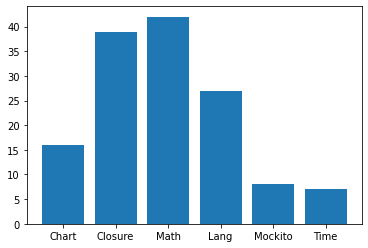

In [101]:
bar_graph(direction_result_in_project)

In [102]:
direction_result_in_project_ratio = {}
direction_result_in_project_ratio['Chart'] = direction_result_in_project['Chart'] * 100 / 26
direction_result_in_project_ratio['Closure'] = direction_result_in_project['Closure'] * 100 / 133
direction_result_in_project_ratio['Lang'] = direction_result_in_project['Lang'] * 100 / 65
direction_result_in_project_ratio['Math'] = direction_result_in_project['Math'] * 100 / 106
direction_result_in_project_ratio['Mockito'] = direction_result_in_project['Mockito'] * 100 / 38
direction_result_in_project_ratio['Time'] = direction_result_in_project['Time'] * 100 / 27

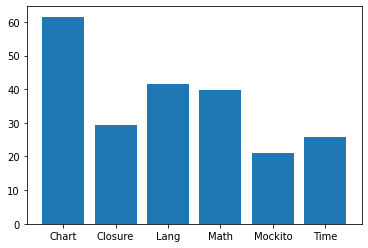

In [103]:
bar_graph(direction_result_in_project_ratio)

### Defects4j Loc calcualtion

In [104]:
command_line_diff_dir = '../Data/CommandlineDiff/'
projects = ['Chart', 'Closure', 'Lang', 'Math', 'Mockito', 'Time']

In [109]:
def calculate_diff_loc(file_dir):
    total_diff = 0
    hunk_diff = 0
    delete_line_num = 0
    insert_line_num = 0
    with open(file_dir, 'r') as f:
        while True:
            line = f.readline()
            if not line: break
            if line.startswith('<'):
                delete_line_num += 1
            elif line.startswith('>'):
                insert_line_num += 1
            elif line.startswith('-'):
                pass
            else:
                total_diff += max(delete_line_num, insert_line_num)
                delete_line_num = insert_line_num = 0
        total_diff += max(delete_line_num, insert_line_num)
    return total_diff
                

In [110]:
defects4j_loc_dict = {}
for project_name in projects:
    project_folder_dir = '{}{}/'.format(command_line_diff_dir, project_name)
    for bug_id in os.listdir(project_folder_dir):
        bug_folder_dir = '{}{}/'.format(project_folder_dir, bug_id)
        diff_num = 0
        for diff_file_name in os.listdir(bug_folder_dir):
            diff_file_dir = '{}{}'.format(bug_folder_dir, diff_file_name)
            diff_num += calculate_diff_loc(diff_file_dir)
        defects4j_loc_dict['{}_{}'.format(project_name, bug_id)] = diff_num

In [115]:
print(type(defects4j_loc_dict))

<class 'dict'>


In [116]:
loc_list = []
for bug_id in direction_perfect_case_bug_id_list:
    loc_list.append(defects4j_loc_dict[bug_id])

mean:4.568345323741007


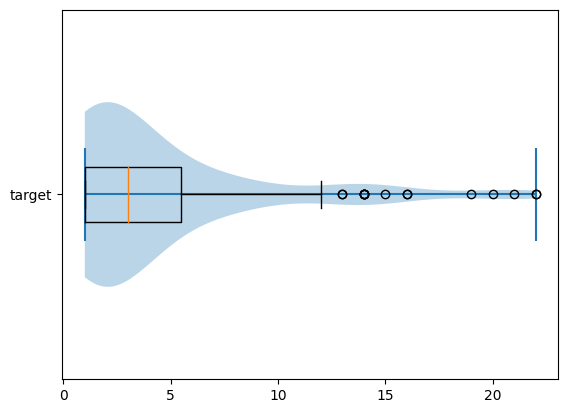

In [117]:
violin_and_boxplot(loc_list)

In [119]:
direction_fail_bug_id_list = []
for bug_id in global_search_perfect_case_bug_id_list:
    if bug_id not in direction_perfect_case_bug_id_list:
        direction_fail_bug_id_list.append(bug_id)



mean:5.404494382022472


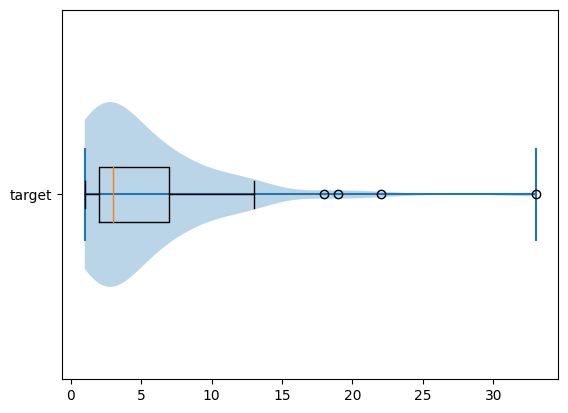

In [120]:
failed_loc_list = []
for bug_id in direction_fail_bug_id_list:
    failed_loc_list.append(defects4j_loc_dict[bug_id])
violin_and_boxplot(failed_loc_list)

In [133]:
bargraph_key_list = list(set(loc_list + failed_loc_list))
bargraph_loc_dict = {}
for num in bargraph_key_list:
    bargraph_loc_dict[num] = loc_list.count(num)
bargraph_failed_loc_dict = {}
for num in bargraph_key_list:
    bargraph_failed_loc_dict[num] = failed_loc_list.count(num)


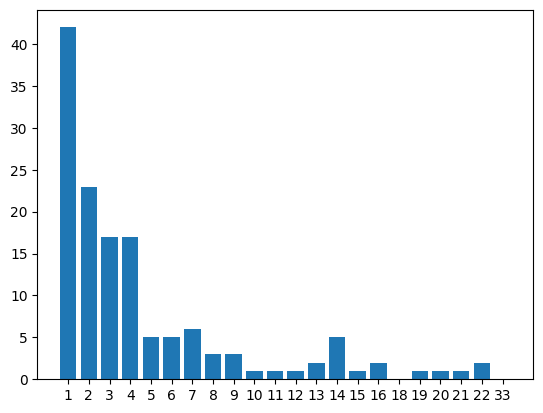

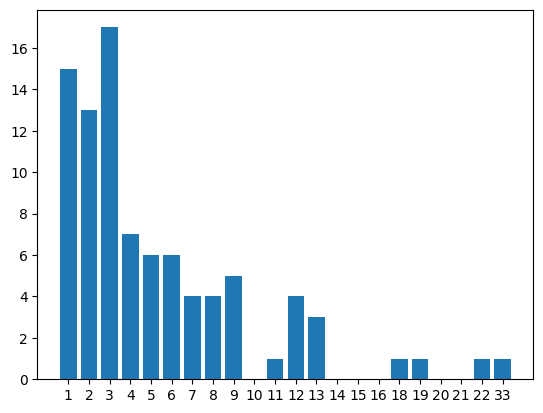

In [134]:
bar_graph(bargraph_loc_dict)
bar_graph(bargraph_failed_loc_dict)

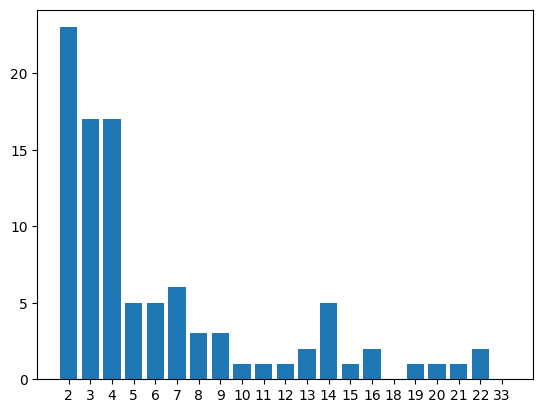

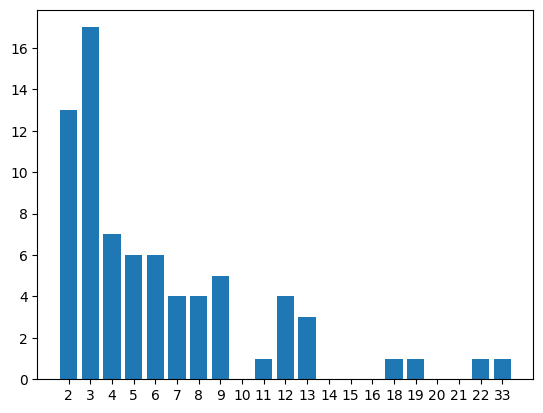

In [135]:
del(bargraph_loc_dict[1])
del(bargraph_failed_loc_dict[1])
bar_graph(bargraph_loc_dict)
bar_graph(bargraph_failed_loc_dict)

In [137]:
pprint(bargraph_loc_dict)
pprint(bargraph_failed_loc_dict)

{2: 23,
 3: 17,
 4: 17,
 5: 5,
 6: 5,
 7: 6,
 8: 3,
 9: 3,
 10: 1,
 11: 1,
 12: 1,
 13: 2,
 14: 5,
 15: 1,
 16: 2,
 18: 0,
 19: 1,
 20: 1,
 21: 1,
 22: 2,
 33: 0}
{2: 13,
 3: 17,
 4: 7,
 5: 6,
 6: 6,
 7: 4,
 8: 4,
 9: 5,
 10: 0,
 11: 1,
 12: 4,
 13: 3,
 14: 0,
 15: 0,
 16: 0,
 18: 1,
 19: 1,
 20: 0,
 21: 0,
 22: 1,
 33: 1}
